In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.dtypes


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df_numeric = df.select_dtypes(include = np.number)
df_numeric.columns.to_list()

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [6]:
df_cat = df.select_dtypes(include = 'object')
df_cat.columns.to_list()

['Surname', 'Geography', 'Gender']

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


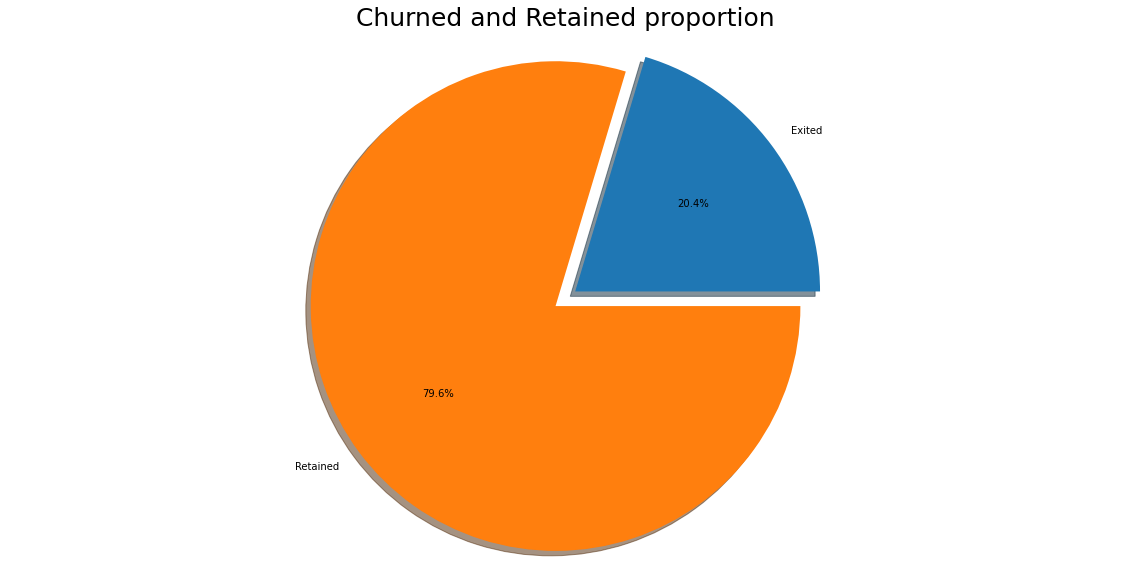

In [10]:
fig, axs = plt.subplots(figsize=(20, 10))
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
axs.pie(sizes, explode=(0, 0.1), labels=['Exited', 'Retained'], autopct='%1.1f%%',shadow=True)
axs.axis('equal')
plt.title("Churned and Retained proportion", size = 25)
plt.show()


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

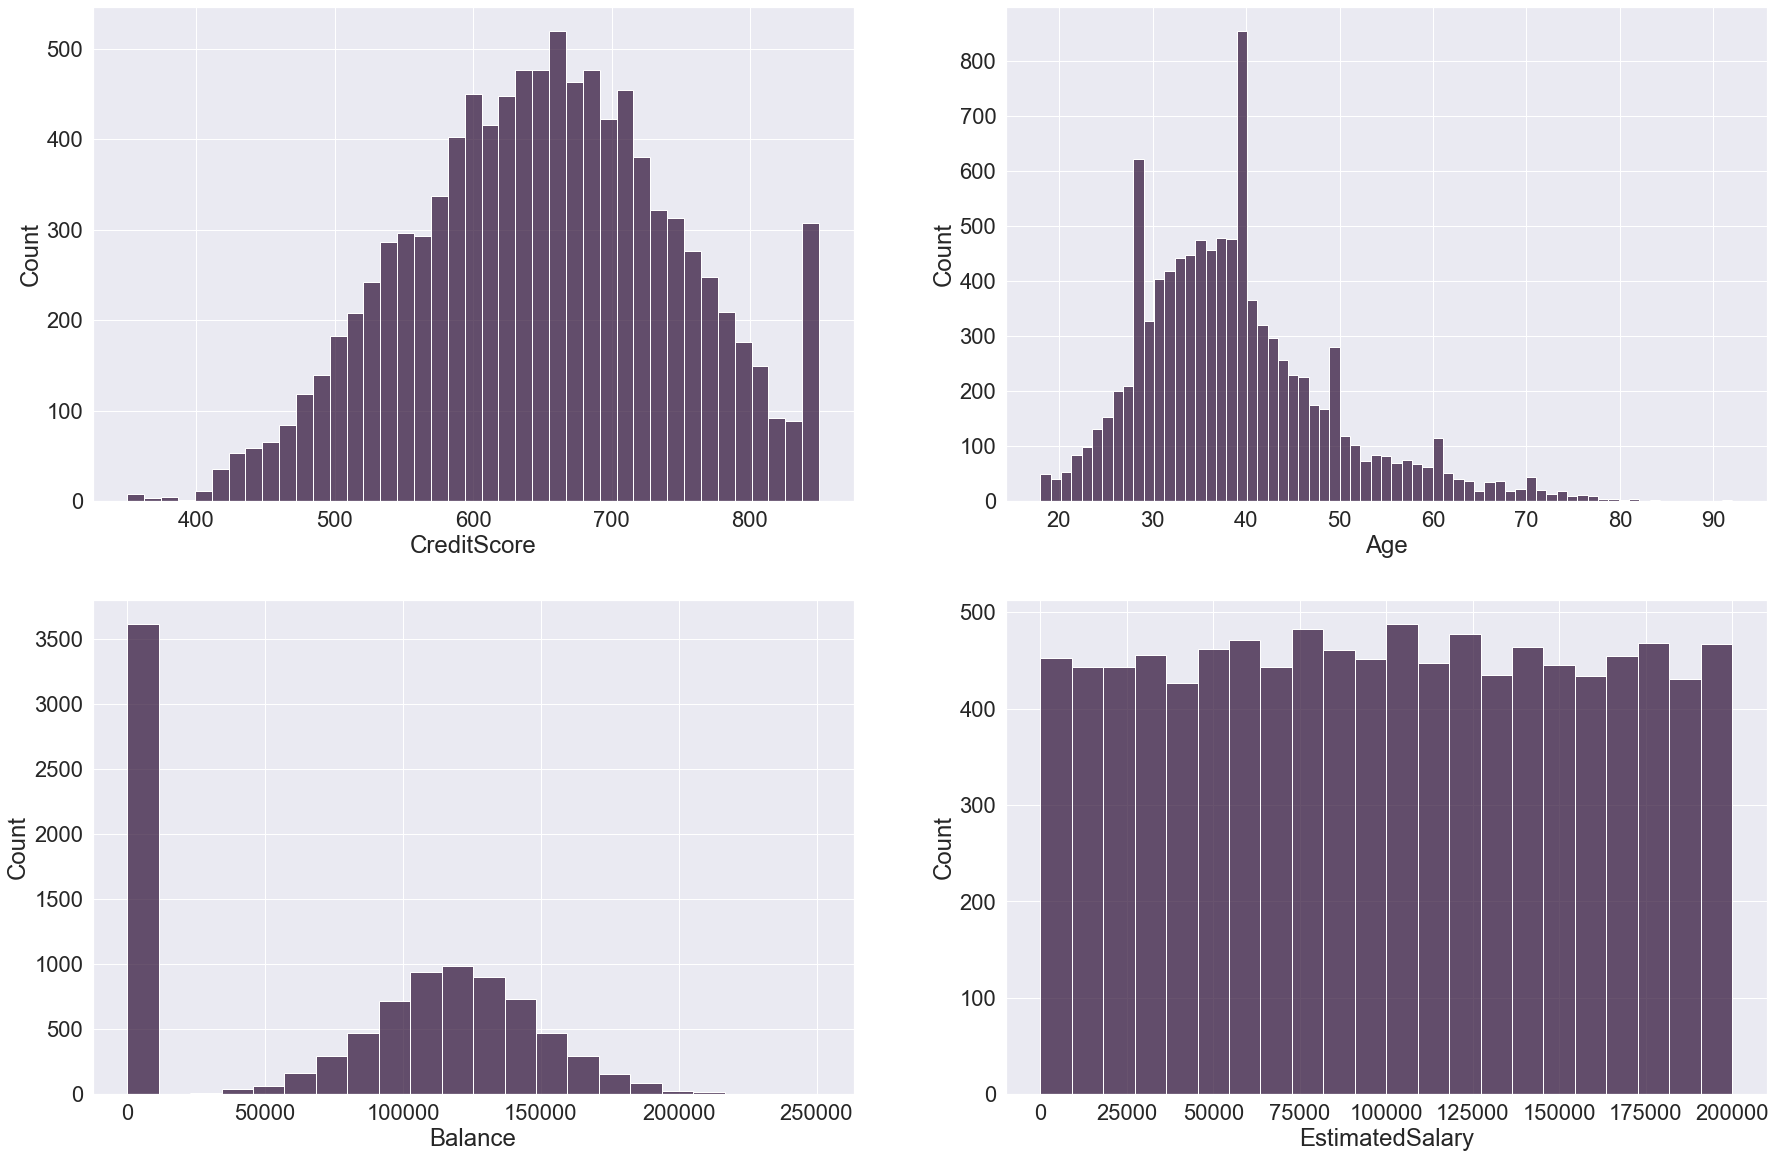

In [11]:
sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale = 2)
fig,axs = plt.subplots(2,2)
sns.set_theme(palette="rocket")
sns.histplot(data = df,x = "CreditScore",ax=axs[0,0])
sns.histplot(data = df,x = "Age",ax=axs[0,1])
sns.histplot(data = df,x = "Balance",ax=axs[1,0])
sns.histplot(data = df,x = "EstimatedSalary",ax=axs[1,1])


<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

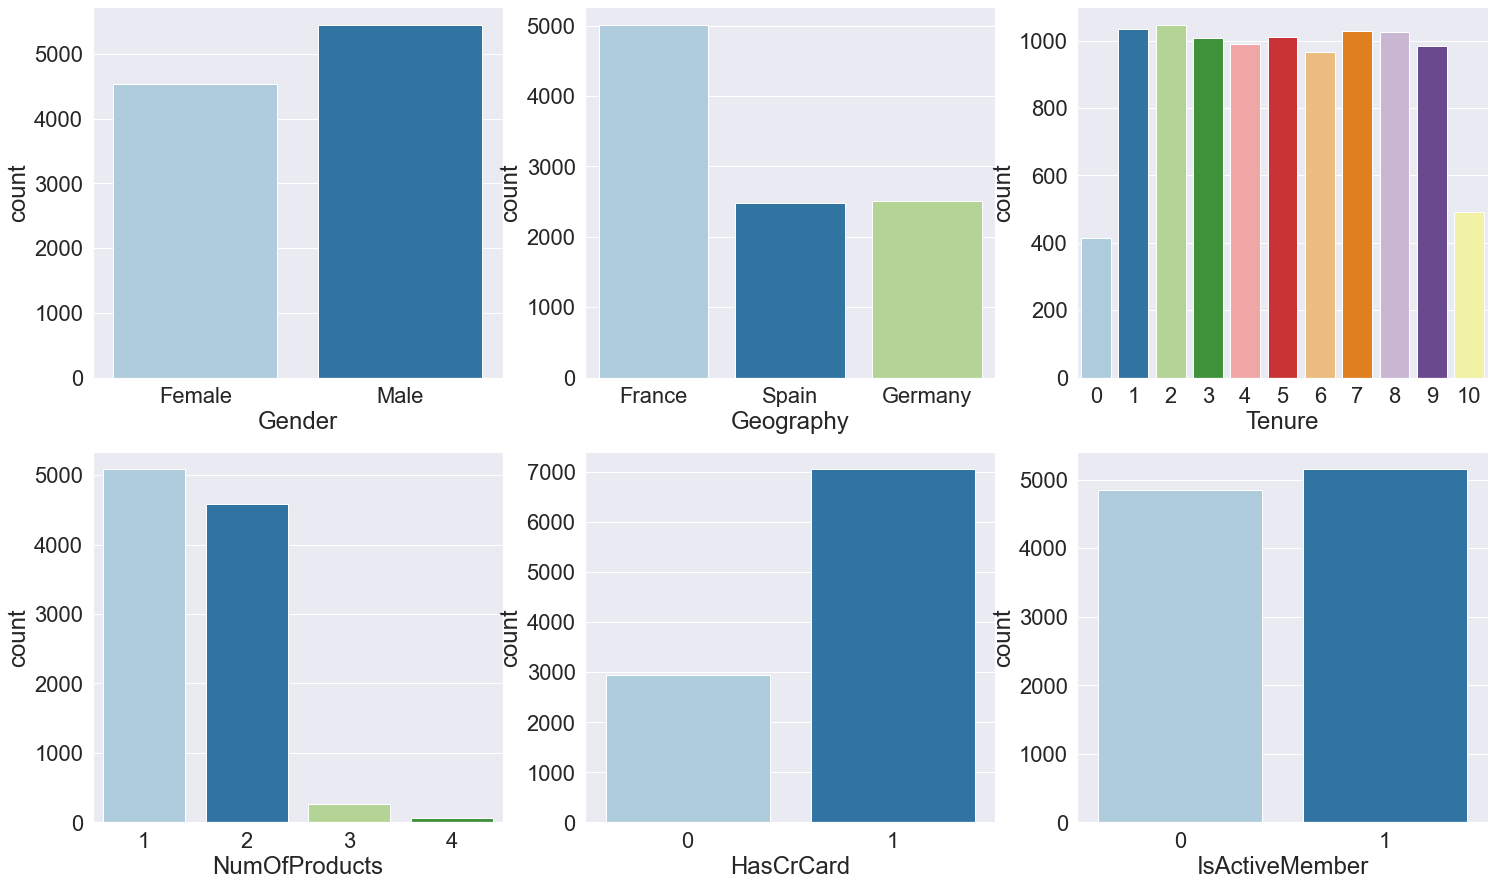

In [12]:

sns.set(rc={'figure.figsize':(25,15)})
sns.set(font_scale = 2)
fig,axs = plt.subplots(2,3)
sns.set_theme(palette="Paired")
sns.countplot(data = df,x = 'Gender',ax=axs[0,0])
sns.countplot(data = df,x = 'Geography',ax=axs[0,1])
sns.countplot(data = df,x = 'Tenure',ax=axs[0,2])
sns.countplot(data = df,x = 'NumOfProducts',ax=axs[1,0])
sns.countplot(data = df,x = 'HasCrCard',ax=axs[1,1])
sns.countplot(data = df,x = 'IsActiveMember',ax=axs[1,2])


<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

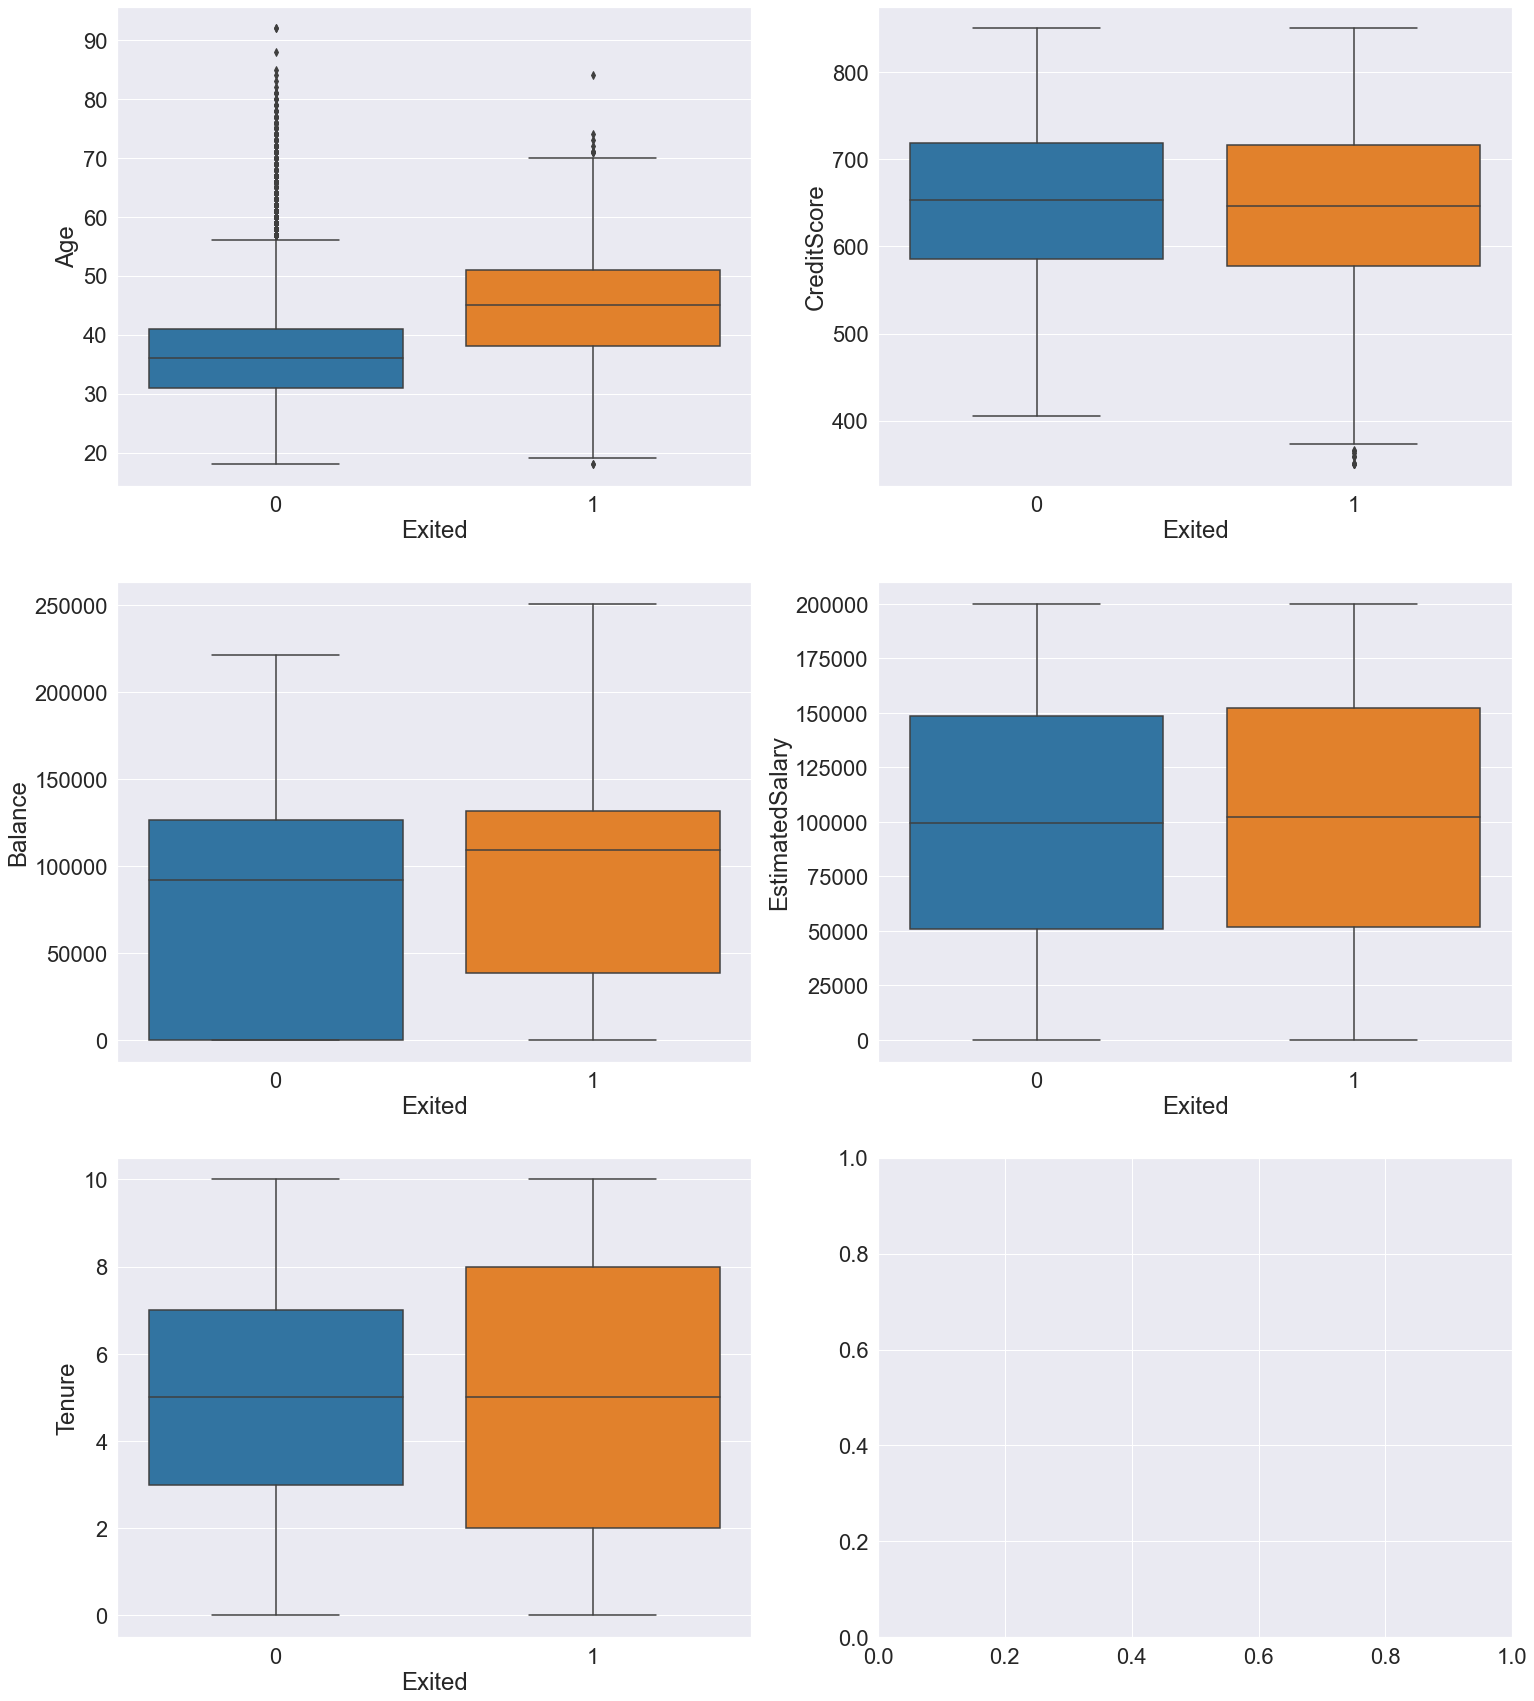

In [13]:
sns.set(rc={'figure.figsize':(25,30)})
sns.set(font_scale = 2)
fig,axs = plt.subplots(3,2)
sns.set_theme(palette="tab10")
sns.boxplot(data = df,x = "Exited",y = "Age",ax = axs[0,0])
sns.boxplot(data = df,x = "Exited",y = "CreditScore",ax = axs[0,1])
sns.boxplot(data = df,x = "Exited",y = "Balance",ax = axs[1,0])
sns.boxplot(data = df,x = "Exited",y = "EstimatedSalary",ax = axs[1,1])
sns.boxplot(data = df,x = "Exited",y = "Tenure",ax=axs[2,0])

In [14]:
df[['Geography','Gender','Exited']].groupby(['Geography','Gender']).agg(['mean','count'])
#Use GroupBy function to check how “Gender” and “Geography” are related to customer churn.
#Finding: In general, females are more likely to “exit” than males. The exit (churn) rate in Germany is higher than in France and Spain.

Exited      
                      mean count
Geography Gender                
France    Female  0.203450  2261
          Male    0.127134  2753
Germany   Female  0.375524  1193
          Male    0.278116  1316
Spain     Female  0.212121  1089
          Male    0.131124  1388

<AxesSubplot:>

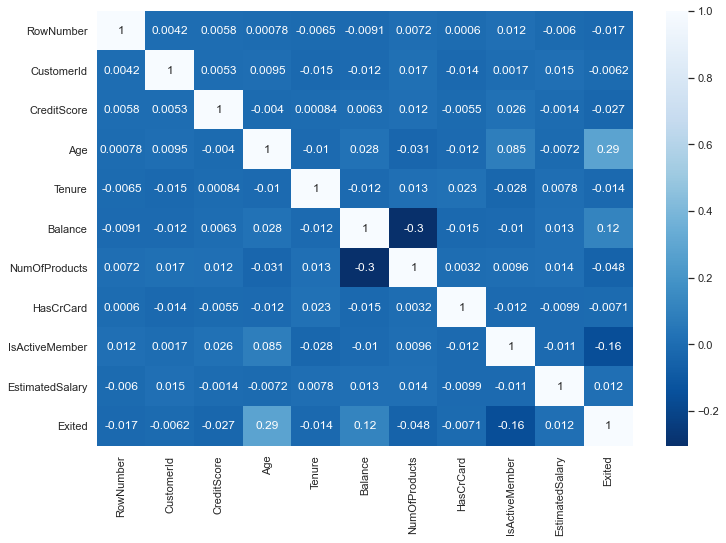

In [15]:
df['Gender'].replace({'Male':0, 'Female':1}, inplace=False)
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='Blues_r', annot=True)
#The “Age”, “Balance”, and “Gender” columns are positively correlated with customer churn (“Exited”). There is a negative correlation between being an active member (“IsActiveMember”) and customer churn.
#If we compare “Balance” and “Balance_binary”, you will notice a very strong positive correlation since we created one based on the other.

# Feature Engineering:-

In [16]:
#Feature Selection :
    
df_ml = df.copy()
df_ml = df_ml.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df_ml.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df_ml = df_ml.drop(['Geography','Gender'],axis = 1)


In [18]:
encoded = pd.get_dummies(df,columns = ['Geography','Gender'])
encoded = encoded.drop(columns= ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],axis = 1)
encoded.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0


In [19]:
df_ml = pd.concat([df_ml,encoded], axis=1)
df_ml.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [20]:
df_ml.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
x = df_ml.drop(['Exited'], axis=1)
y = df_ml['Exited']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0)

In [23]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train) 
x_test = sc_x.transform(x_test)

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
print(log_reg.score(x_train, y_train))
# 80.85%
print(log_reg.score(x_test, y_test))
# 81.1%
# No overfitting detected. Train accuracy ~ Test accuracy.


0.8085
0.811


In [25]:
# Prediction generation and analysis

y_pred = log_reg.predict(x_test)


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

FP = cm[0][1]
FN = cm[1][0]

per_fp = FP / len(y_test) * 100
print(per_fp)# 3.45%

per_fn = FN / len(y_test) * 100
print(per_fn) # 15.45%

# FN is more than 4 times of FP

3.45
15.45


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_test, y_pred)) # 58.18%
print(recall_score(y_test, y_pred)) # 23.70%
print(f1_score(y_test, y_pred)) # 33.68%

0.5818181818181818
0.23703703703703705
0.3368421052631579


In [28]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(x_train, y_train)

print(dtf.score(x_train, y_train)) # 100%
print(dtf.score(x_test, y_test)) # 81%

# Severe overfitting detected. # Train accuracy >> Test accuracy
# Overcome overfitting ----> Apply regularization

1.0
0.807


In [58]:
# In order to apply regularizatin on tree based algos, we use the following

dtf = DecisionTreeClassifier(max_depth = 7)
dtf.fit(x_train, y_train)

print(dtf.score(x_train, y_train)) #87.36%
print(dtf.score(x_test, y_test)) #85.7%

0.873625
0.8575


In [30]:

# Overfitting handled

y_pred_dtf = dtf.predict(x_test)
cm_dtf = confusion_matrix(y_test, y_pred_dtf)

FP = cm_dtf[0][1]
FN = cm_dtf[1][0]

per_fp = FP / len(y_test) * 100
print(per_fp) # 4.85

per_fn = FN / len(y_test) * 100
print(per_fn)# 9.45


4.8
9.45


In [59]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [3, 5, 7, 9, 11, 13],
          'criterion': ['gini', 'entropy']}

grid = GridSearchCV(DecisionTreeClassifier(), params)
grid.fit(x_train, y_train)

print(grid.best_params_)
best_dt = grid.best_estimator_


{'criterion': 'entropy', 'max_depth': 7}


In [72]:

y_pred_dtc = dtf.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dtc))



              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.69      0.53      0.60       405

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

